**1η Εργασία: Τα βασικά της μηχανικής μάθησης**

Ονοματεπώνυμο : Κωνσταντίνος Κίτσος

Α.Μ: 1115201900082

# 1: Πράξεις με Διανύσματα και Πίνακες


# Πράξεις με python

Αρχικοποίηση :

In [ ]:
import numpy as np


np.random.seed(82)
X=np.random.randint(10, size=(3, 4))

np.random.seed(82)
Y=np.random.randint(10, size=(4, 3))

np.random.seed(82)
a=np.random.randint(10, size=(1, 4))

np.random.seed(1900)
b=np.random.randint(10, size=(1, 4))



In [ ]:
print("X:",X)
print("Y:",Y)
print("a:",a)
print("b:",b)

X: [[3 2 3 6]
 [2 0 1 1]
 [3 3 9 5]]
Y: [[3 2 3]
 [6 2 0]
 [1 1 3]
 [3 9 5]]
a: [[3 2 3 6]]
b: [[2 3 4 5]]


1.1)

In [ ]:
np.inner(a,b)

array([[54]])

1.2)

In [ ]:
np.matmul(X,a.T)

array([[58],
       [15],
       [72]])

1.3)

In [ ]:
np.matmul(X,Y)

array([[42, 67, 48],
       [10, 14, 14],
       [51, 66, 61]])

1.4)

In [ ]:
from numpy import linalg

linalg.norm(a)

7.615773105863909

# Πράξεις με το χέρι

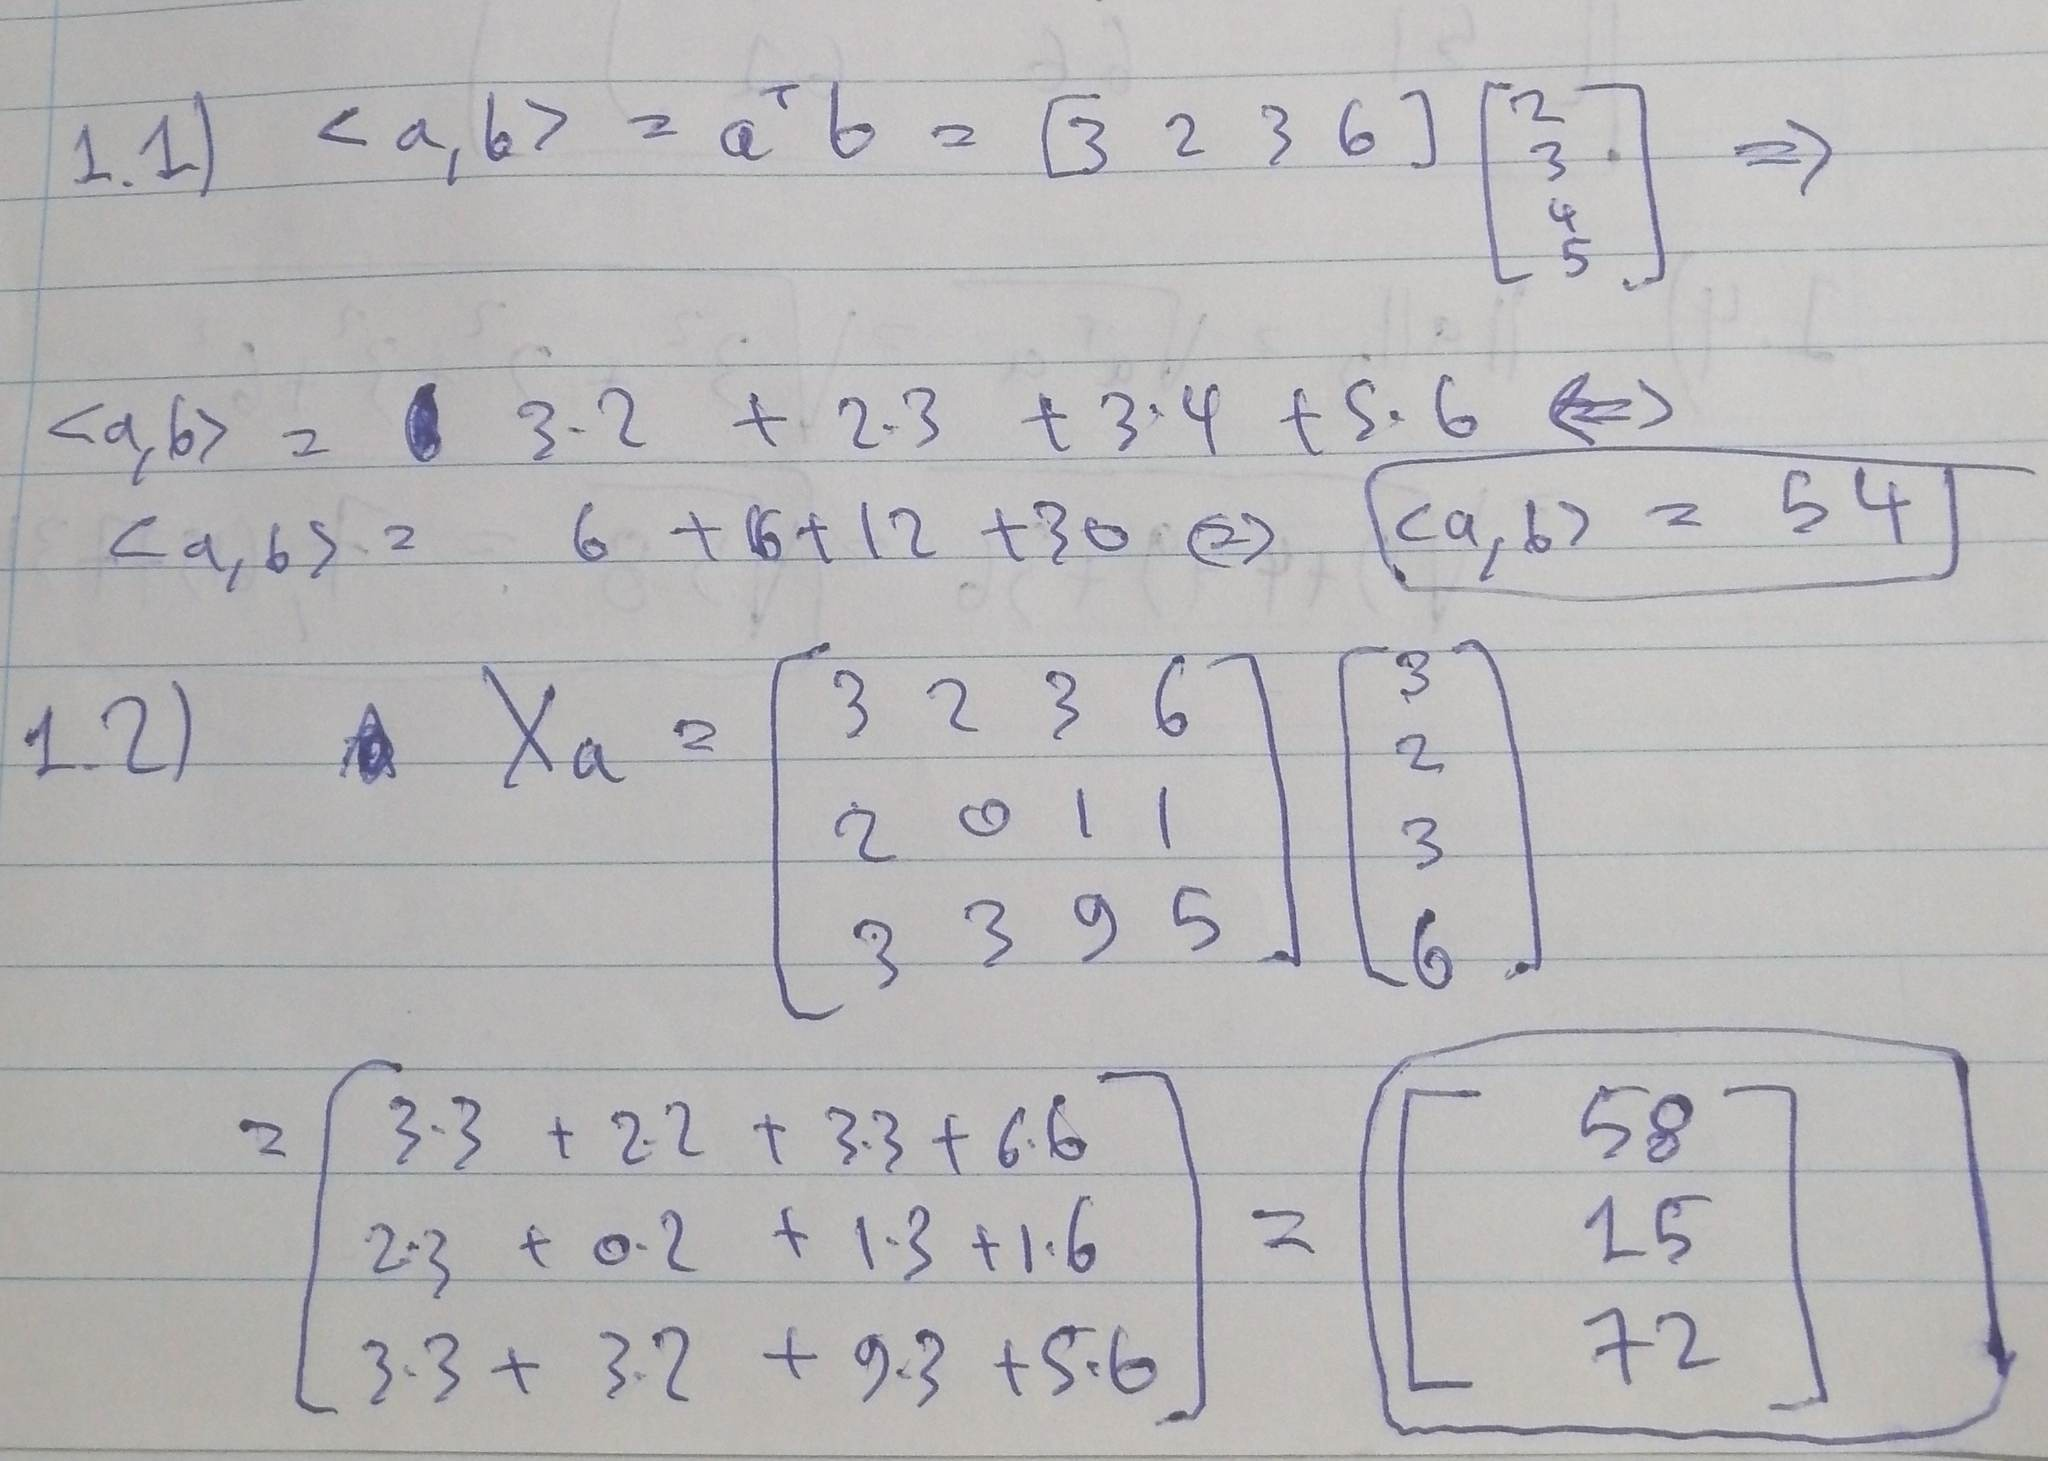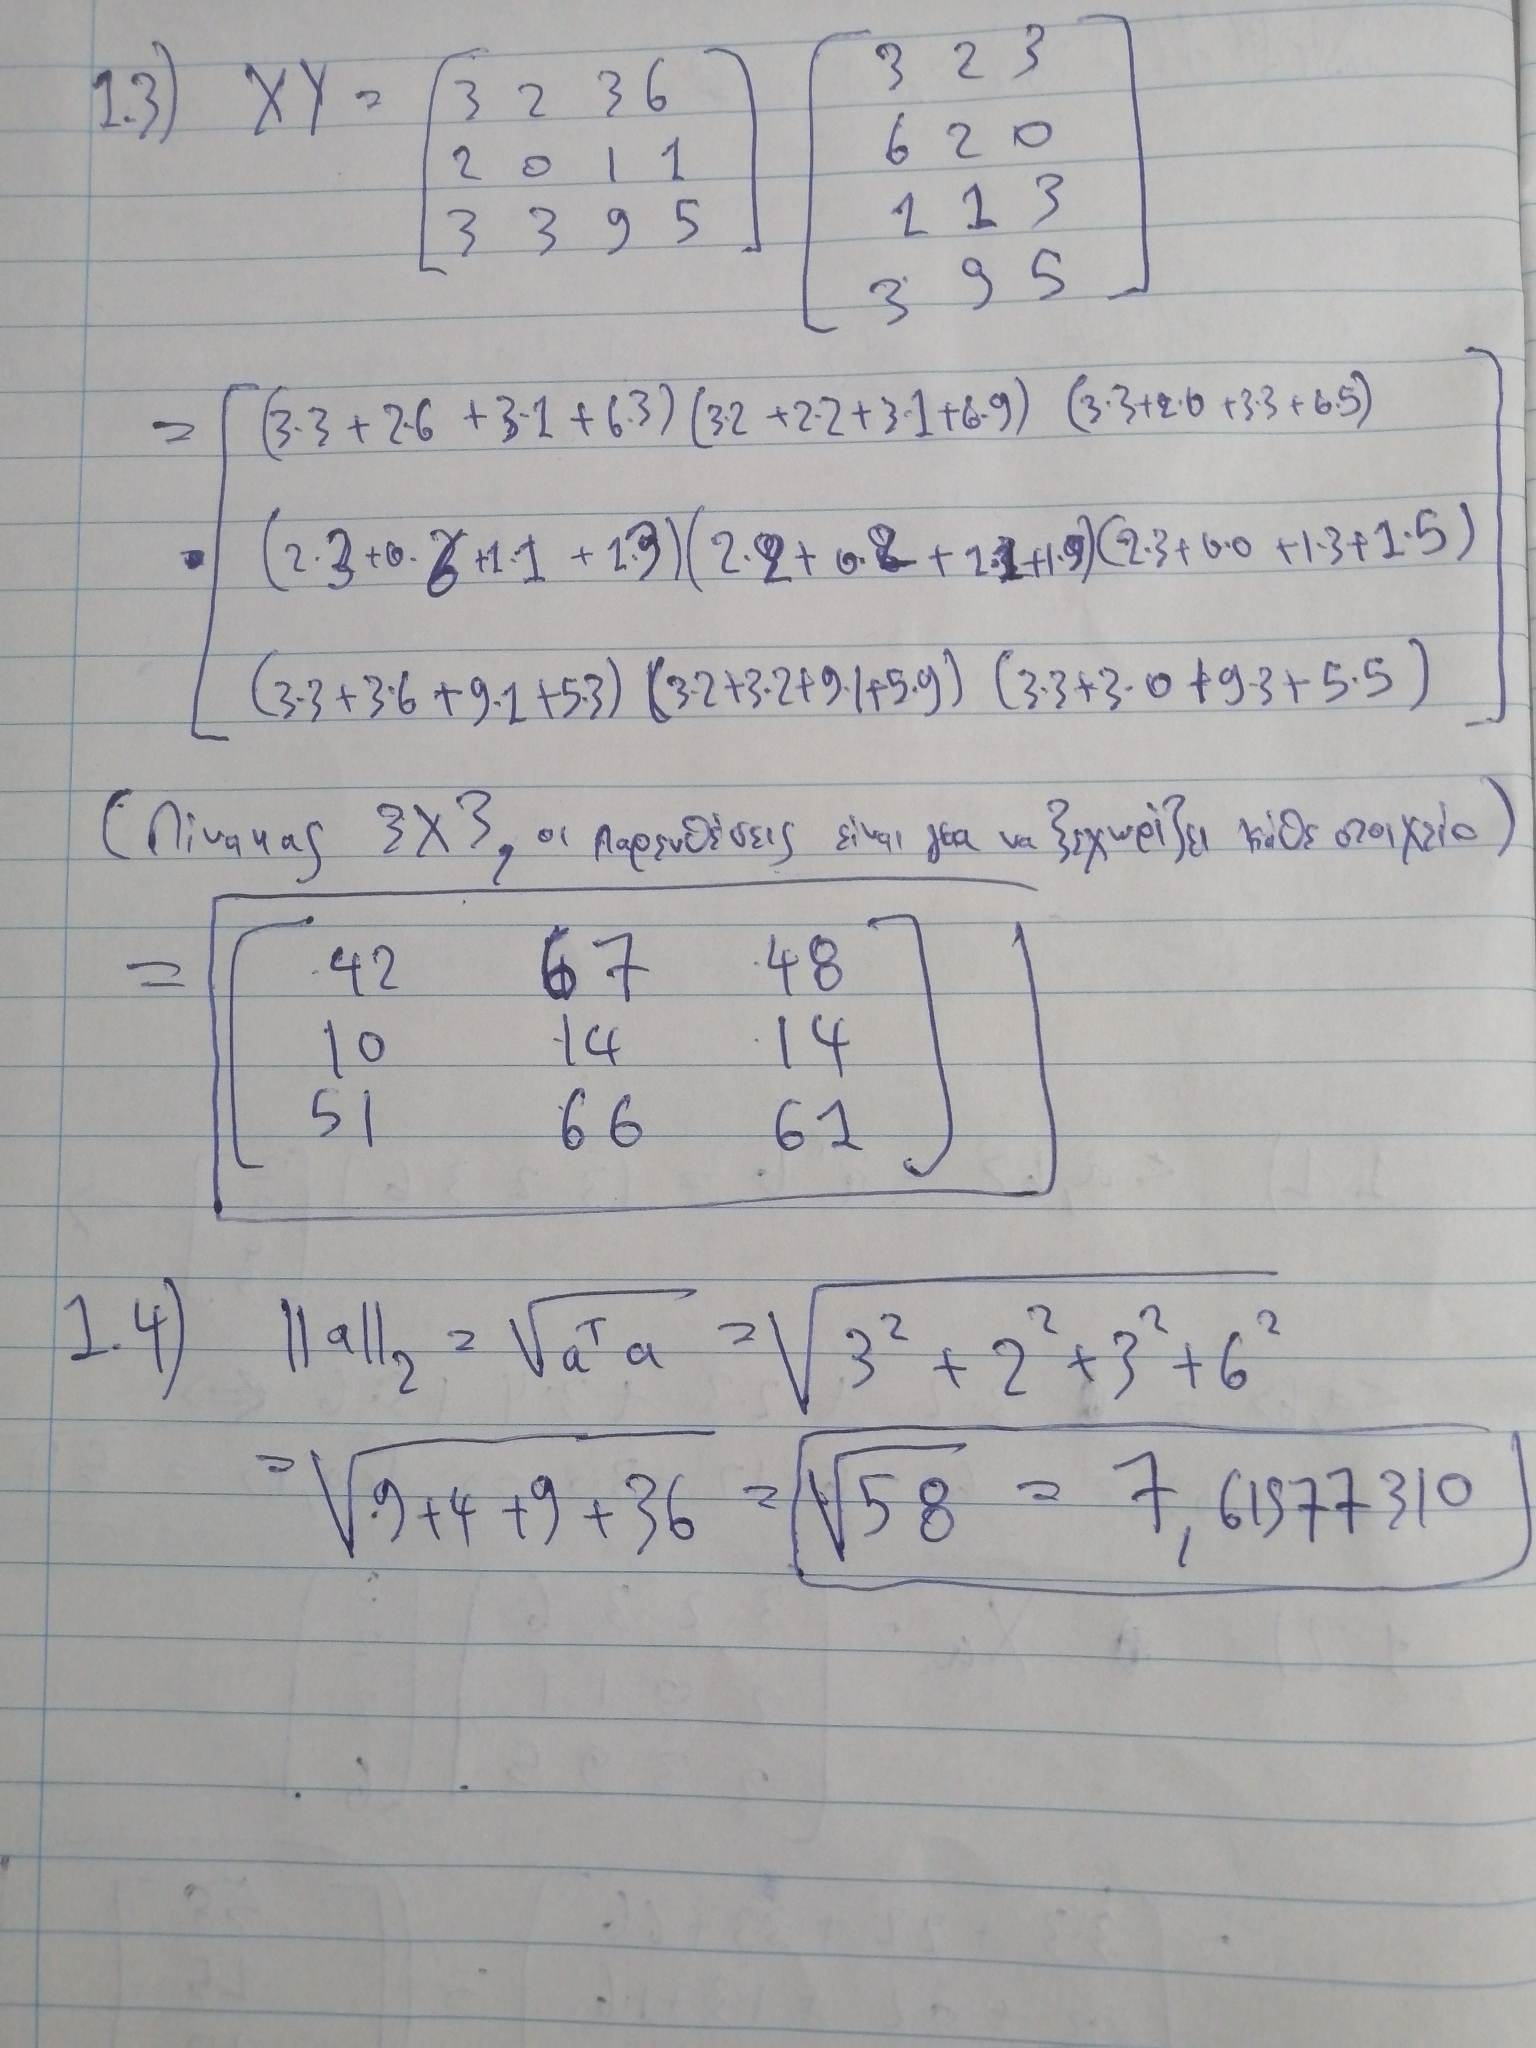

# 2: Υπολογισμός παραγώγων

# 2.1)

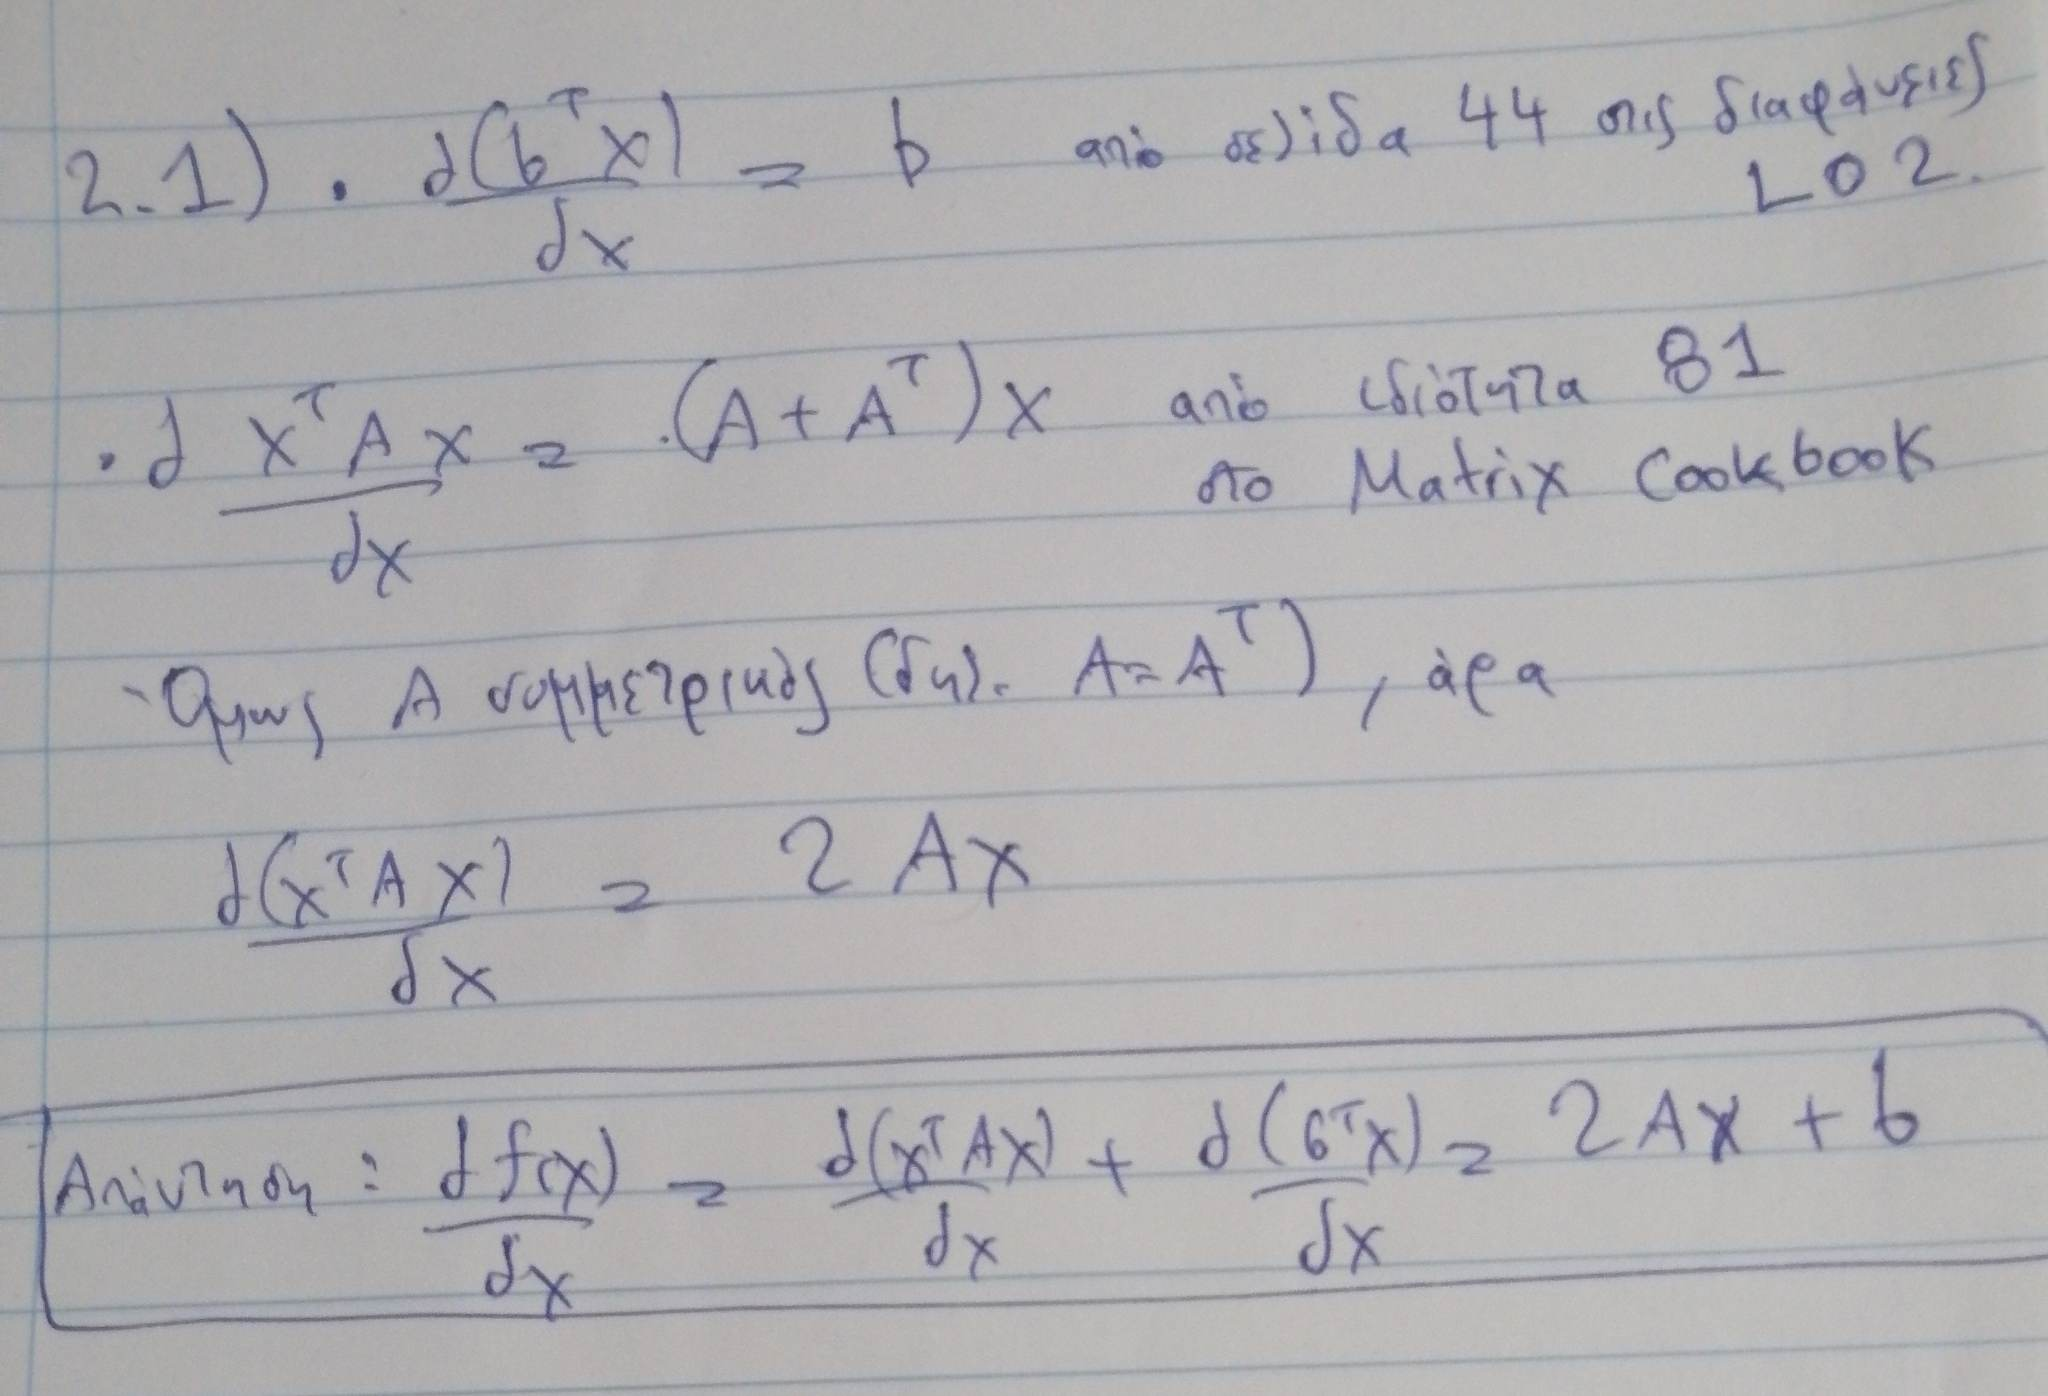

# 3: Gradient descent

# Ορισμός συναρτήσεων

In [ ]:
from sympy import *
x1, x2 = symbols('x1 x2')

In [ ]:
f1=(x1 - 2)**2 + (x2 - 3)**2
f2=(1 - (x2 - 3))**2 + 20*((x1 + 3) - (x2 - 3)**2)**2
print("f1 = ",f1)
print("f2 = ",f2)

f1 =  (x1 - 2)**2 + (x2 - 3)**2
f2 =  (4 - x2)**2 + 20*(x1 - (x2 - 3)**2 + 3)**2


In [ ]:
print('df1/dx2 =',diff(f1,x2))

print('df2/dx1 =',diff(f2,x1))
print('df2/dx2 =',diff(f2,x2))

df1/dx1 = 2*x1 - 4
df1/dx2 = 2*x2 - 6
df2/dx1 = 40*x1 - 40*(x2 - 3)**2 + 120
df2/dx2 = 2*x2 + 20*(12 - 4*x2)*(x1 - (x2 - 3)**2 + 3) - 8


# Υλοποίηση του Gradient Descent

In [ ]:
def GD(f,x1_0,x2_0,iterations,lr):
  solutions=[]
  for i in range(0,iterations) :
    u1=x1_0 - lr*(diff(f,x1).subs({x1:x1_0, x2:x2_0}) )
    u2=x2_0 - lr*(diff(f,x2).subs({x1:x1_0, x2:x2_0}) )
    x1_0=u1
    x2_0=u2
    solutions.append(f.subs({x1:u1, x2:u2}))   
  return solutions   # solutions is a list of the value of f in each step

def GD_convergence(f,x1_0,x2_0,iterations,lr,threshold=0.001): # Gradient descent with threshold
  solutions=[]
  for i in range(0,iterations) :
    u1=x1_0 - lr*(diff(f,x1).subs({x1:x1_0, x2:x2_0}) )
    u2=x2_0 - lr*(diff(f,x2).subs({x1:x1_0, x2:x2_0}) )
    solutions.append(f.subs({x1:u1, x2:u2})) 
    if abs(x1_0 -u1) <= threshold and abs(x2_0 -u2)<=threshold:
      break
    x1_0=u1
    x2_0=u2
  return [i+1,solutions] # return the number of steps as well


# Να εκτελέστε Τ=10 επαναλήψεις και αναφέρετε την τιμή της συνάρτησης στο τέλος κάθε βήματος (επανάληψης)

In [ ]:
f1_values = GD(f1,0,0,10,0.5)
f2_values = GD(f2,0,0,10,0.5)

print("The values of f1 in 10 steps using learning_rate=0.5 and x1=0 and x2=0 are :\n",f1_values)
print("The values of f2 in 10 steps using learning_rate=0.5 and x1=0 and x2=0 are :\n",f2_values)

The values of f1 in 10 steps using learning_rate=0.5 and x1=0 and x2=0 are :
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The values of f2 in 10 steps using learning_rate=0.5 and x1=0 and x2=0 are :
 [5402136508880.00, 1.00944358810678e+42, 6.58303456372108e+129, 1.82582176549974e+393, 3.89542739261895e+1183, 3.78307817355730e+3554, 3.46510118416405e+10667, 2.66273371206064e+32006, 1.20826775139761e+96023, 1.12893653232202e+288073]


# Γραφήματα που απεικονίζουν την τιμή κάθε συνάρτησης ως συνάρτηση των επαναλήψεων

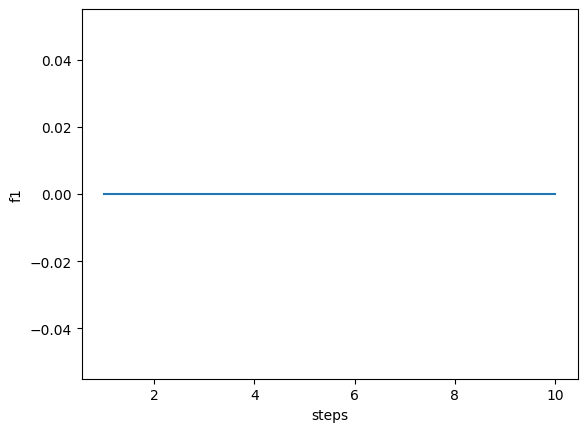

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,11),f1_values)
plt.xlabel('steps')
plt.ylabel('f1')
plt.show()


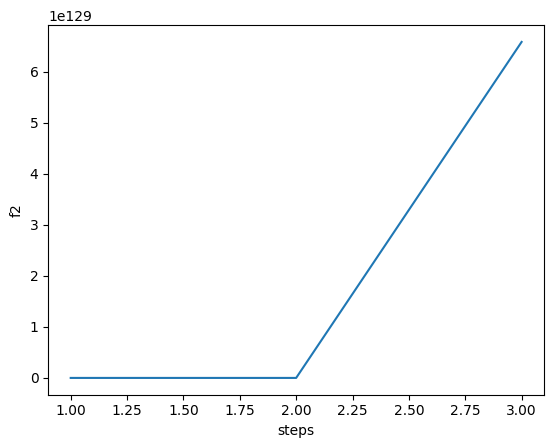

In [ ]:
plt.plot(range(1,11),f2_values)
plt.xlabel('steps')
plt.ylabel('f2')
plt.show()

Παρατηρήσεις : 
-Για τις συγκεκριμένες αρχικές τιμές και παραμέτρους τυχαίνει ο GD να βρίσκει από το πρώτο βήμα τις τιμές για το ελάχιστο της f1 .
-Το plot της f2 δεν είναι σωστό λόγω overflow εξαιτίας των υπερβολικά μεγάλων αριθμών 

# **Πόσες επαναλήψεις χρειάζεται ο αλγόριθμος για να συγκλίνει σε στάσιμο σημείο για διαφορετικές τιμές του learning rate για κάθε συνάρτηση**

f1 ,για αρχικες τιμες χ1=0 και χ2=0:

In [ ]:
y09=GD_convergence(f1,0,0,100000,0.9,0.00001)
y075=GD_convergence(f1,0,0,100000,0.75,0.00001)  
ywith05=GD_convergence(f1,0,0,100000,0.5,0.00001)  
y01=GD_convergence(f1,0,0,100000,0.1,0.00001)
y005=GD_convergence(f1,0,0,100000,0.05,0.00001)
y001=GD_convergence(f1,0,0,100000,0.01,0.00001)
y0005=GD_convergence(f1,0,0,100000,0.005,0.00001)
y0001=GD_convergence(f1,0,0,100000,0.001,0.00001)

In [ ]:
print("f1 ) how fast does GD converges with different learning rates:")
print("With lr=0.9 after {} steps. f1-values:{}".format(y09[0],y09[1]))
print("With lr=0.75 after {} steps. f1-values: {}".format(y075[0],y075[1]))
print("With lr=0.5 after {} steps. f1-values: {}".format(ywith05[0],ywith05[1]))
print("With lr=0.1 after {} steps. f1-values: {}".format(y01[0],y01[1]))
print("With lr=0.05 after {} steps. f1-values: {}".format(y005[0],y005[1]))
print("With lr=0.01 after {} steps. f1-values: {}".format(y001[0],y001[1]))
print("With lr=0.005 after {} steps. f1-values:{}".format(y0005[0],y0005[1]))
print("With lr=0.001 after {} steps. f1-values: {}".format(y0001[0],y0001[1]))

f1 ) how fast does GD converges with different learning rates:
With lr=0.9 after 61 steps. f1-values:[8.32000000000000, 5.32480000000000, 3.40787200000001, 2.18103808000000, 1.39586437120000, 0.893353197568001, 0.571746046443521, 0.365917469723854, 0.234187180623266, 0.149879795598890, 0.0959230691832898, 0.0613907642773055, 0.0392900891374754, 0.0251456570479843, 0.0160932205107100, 0.0102996611268543, 0.00659178312118675, 0.00421874119755954, 0.00269999436643810, 0.00172799639452037, 0.00110591769249304, 0.000707787323195540, 0.000452983886845142, 0.000289909687580897, 0.000185542200051771, 0.000118747008033133, 7.59980851412065e-5, 4.86387744903722e-5, 3.11288156738379e-5, 1.99224420312574e-5, 1.27503629000035e-5, 8.16023225600209e-6, 5.22254864384201e-6, 3.34243113205826e-6, 2.13915592451736e-6, 1.36905979169099e-6, 8.76198266682466e-7, 5.60766890677000e-7, 3.58890810033221e-7, 2.29690118421214e-7, 1.47001675789671e-7, 9.40810725054653e-8, 6.02118864035461e-8, 3.85356072982502e-8, 

Γράφημα

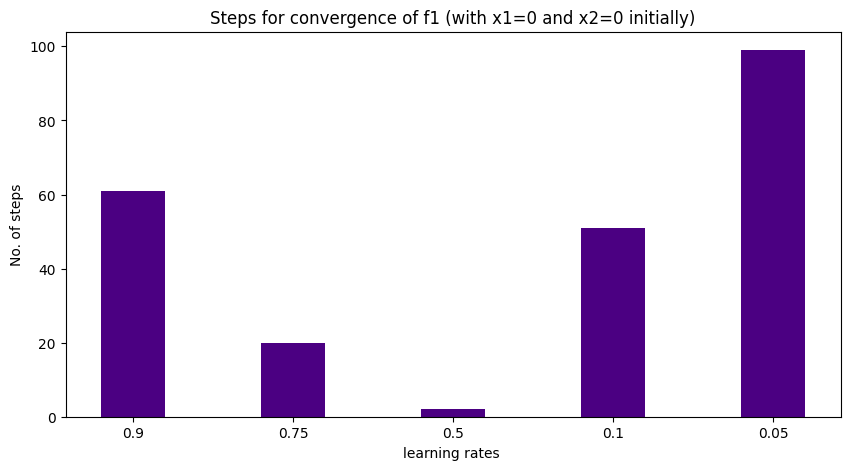

In [ ]:
data = {'0.9':y09[0],'0.75':y075[0],'0.5':ywith05[0],'0.1':y01[0],'0.05':y005[0] }
learning_rates = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(learning_rates, values, color ='indigo',
        width = 0.4)
 
plt.xlabel("learning rates ")
plt.ylabel("No. of steps")
plt.title("Steps for convergence of f1 (with x1=0 and x2=0 initially)")
plt.show()

Παράτηρηση : Η ταχύτητα σύγκλισης μειώνεται όσο απομακρυνόμαστε από το 0.5 , το οποίο είναι το γρηγορότερο για τις αρχικές τιμές που βάλαμε

f2 ,για αρχικες τιμες χ1=0 και χ2=0

Πριν προχωρήσουμε σε γραφήματα , ας βρούμε ενα πεδιο που ο αλγόριθμος συγκλινει 

In [ ]:
def show_fvalues(f,x1_0,x2_0,iterations,lr):  
  fvalues= GD(f,x1_0,x2_0,iterations,lr)
  print("With learning rate {} , after {} steps values are {}".format(lr,iterations,fvalues))


show_fvalues(f2,0,0,100,0.1)

show_fvalues(f2,0,0,100,0.01)

show_fvalues(f2,0,0,100,0.005)

show_fvalues(f2,0,0,100,0.001)

show_fvalues(f2,0,0,100,0.0001)


With learning rate 0.1 , after 100 steps values are [8064340593.79200, 5.38470353363385e+30, 1.59876763748409e+93, 4.18461976970197e+280, 7.50357044460652e+842, 4.32617266590257e+2529, 8.29108759705540e+7589, 5.83625780024917e+22770, 2.03565116820727e+68313, 8.63793701488218e+204940, 6.59978906893098e+614823, 2.94367678882643e+1844472, 2.61198288496753e+5533418, 1.82478178571357e+16600256, 6.22203956820183e+49800769, 2.46659736086865e+149402310, 1.53672000204874e+448206932, 3.71607259037164e+1344620797, 5.25475562303037e+4033862393, 1.48579032973410e+12101587182, 3.35871024419248e+36304761547, 3.87987356509581e+108914284643, 5.98070906687566e+326742853931, 2.19057429059028e+980228561796, 1.07640056139152e+2940685685390, 1.27709058569413e+8822057056171, 2.13287334563047e+26466171168514, 9.93562421828699e+79398513505543, 1.00435079775791e+238195540516633, 1.03742388629022e+714586621549900, 1.14332233173755e+2143759864649701, 1.53040373066490e+6431279593949104, 3.67043894023074e+192938387

Ας δοκιμασουμε διαφορα learning rates μικροτερα από το 0.005 στο οποίο ο αλγόριθμος ακόμα αποκλίνει από τη τιμή .


In [ ]:
y4=GD_convergence(f2,0,0,100000,0.004,0.00001)  
y3=GD_convergence(f2,0,0,100000,0.003, 0.00001)
y2=GD_convergence(f2,0,0,100000,0.002,0.00001)
y1=GD_convergence(f2,0,0,100000,0.001,0.00001)
y05=GD_convergence(f2,0,0,100000,0.0005,0.00001)

In [ ]:
print("f2 ) how fast does GD converges with different learning rates:")
print("With lr=0.004 after {} steps. f2-values: {}".format(y4[0],y4[1]))
print("With lr=0.003 after {} steps. f2-values: {}".format(y3[0],y3[1]))
print("With lr=0.002 after {} steps. f2-values: {}".format(y2[0],y2[1]))
print("With lr=0.001 after {} steps. f2-values: {}".format(y1[0],y1[1]))
print("With lr=0.0005 after {} steps. f2-values: {}".format(y05[0],y05[1]))

f2 ) how fast does GD converges with different learning rates:
With lr=0.004 after 3393 steps. f2-values: [297.396262993920, 347.592765658161, 61.6976452301132, 58.0774919498425, 141.144805820254, 20.8888413852505, 37.3819328391823, 34.4158715307257, 67.9496016977610, 31.7274865341491, 57.8633192825046, 27.7087628453741, 46.3459304193571, 24.6408398648453, 38.2033349597820, 21.8641662498106, 31.5760849088786, 19.4250769185278, 26.2810879526738, 17.2966222100249, 22.0515806702837, 15.4515012329330, 18.6763087586066, 13.8636164154020, 15.9885545033408, 12.5083564119987, 13.8560734793218, 11.3626150290538, 12.1732225427481, 10.4046679119522, 10.8548817458157, 9.61396545748156, 9.83178388206636, 8.97090053242370, 9.04696189683558, 8.45661439647884, 8.45309931320713, 8.05290095500749, 8.01061327445542, 7.74225171873101, 7.68631817914283, 7.50805053021357, 7.45252028358888, 7.33488472360221, 7.28639386453607, 7.20890147923854, 7.16950078339912, 7.11811999982430, 7.08734444149715, 7.052620539

Γράφημα

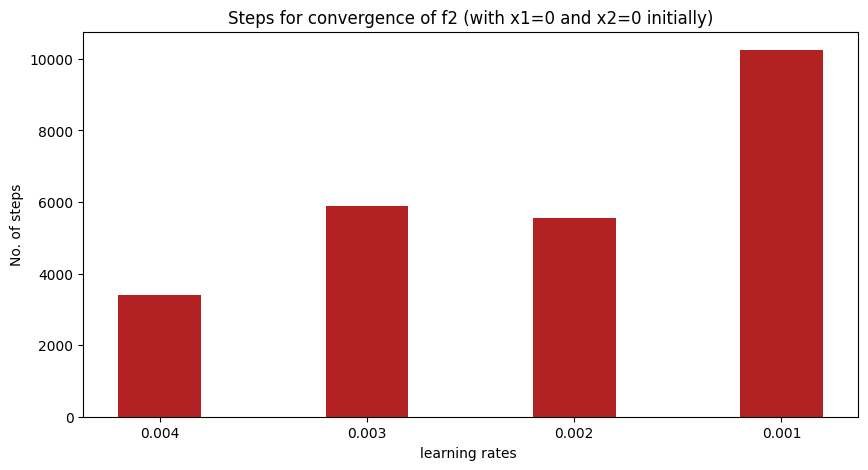

In [ ]:
data = {'0.004':y4[0],'0.003':y3[0],'0.002':y2[0],'0.001':y1[0] }
learning_rates = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(learning_rates, values, color ='firebrick',
        width = 0.4)
 
plt.xlabel("learning rates ")
plt.ylabel("No. of steps")
plt.title("Steps for convergence of f2 (with x1=0 and x2=0 initially)")
plt.show()

#  Γραφήματα των τιμών ως προς το πλήθος επαναλήψεων για διαφορετικές τιμές του learning rate  


Θα υπάρχει πιο πλήρη εικόνα βλεπόντας για κάθε learning rate τις τιμές που έχει η f1 και η f2 σε κάθε βήμα 


In [ ]:
from cycler import cycler

def make_plot00(f,flabel,iterations,l_rates):
  plt.figure(figsize=(18, 12), dpi=80)
  plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b','c','m','y','k','w'])))

  for lr in l_rates:
    values=GD(f,0,0,iterations,lr)
    plt.plot(range(1,iterations+1),values)

  plt.legend( l_rates,title='learning rates',loc='center')
  plt.xlabel('steps')
  plt.ylabel(flabel)
  plt.title(flabel+ " values for different learning rates")
  plt.show()


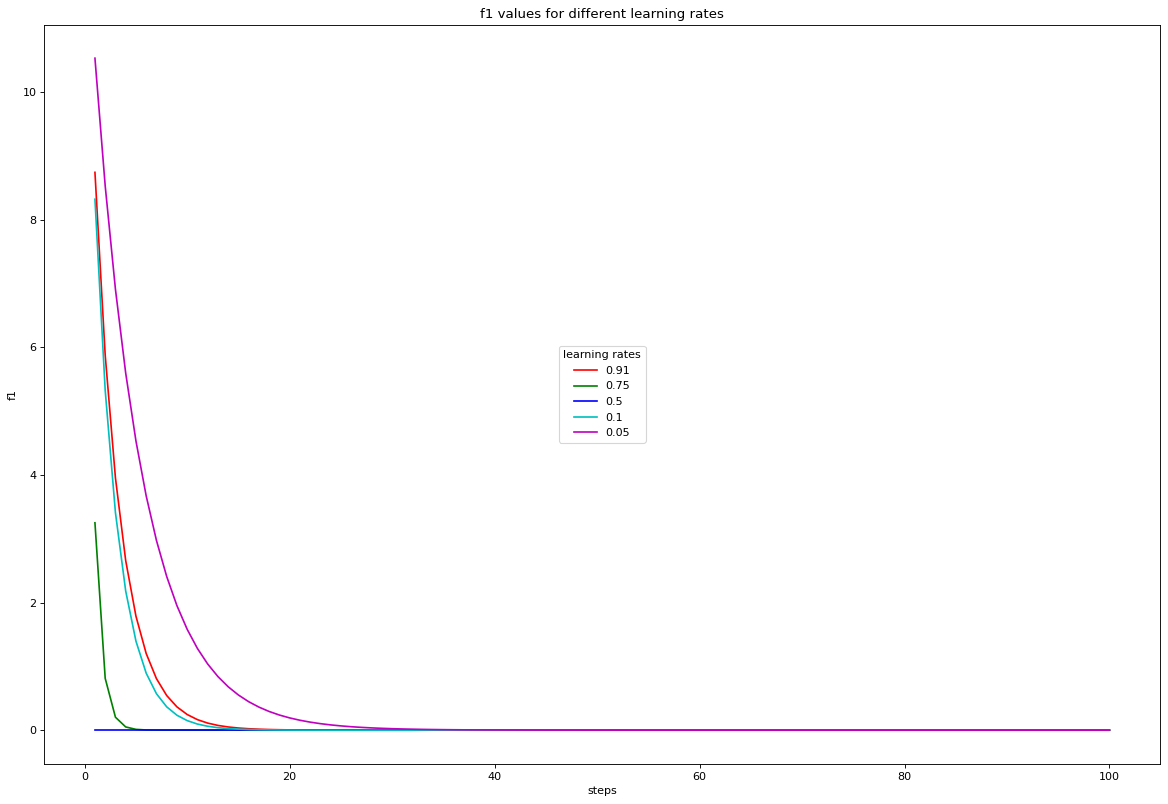

In [ ]:
make_plot00(f1,"f1",100,[0.91,0.75,0.5,0.1,0.05])
# 0.9 is identical to 0.1 so we use 0.91

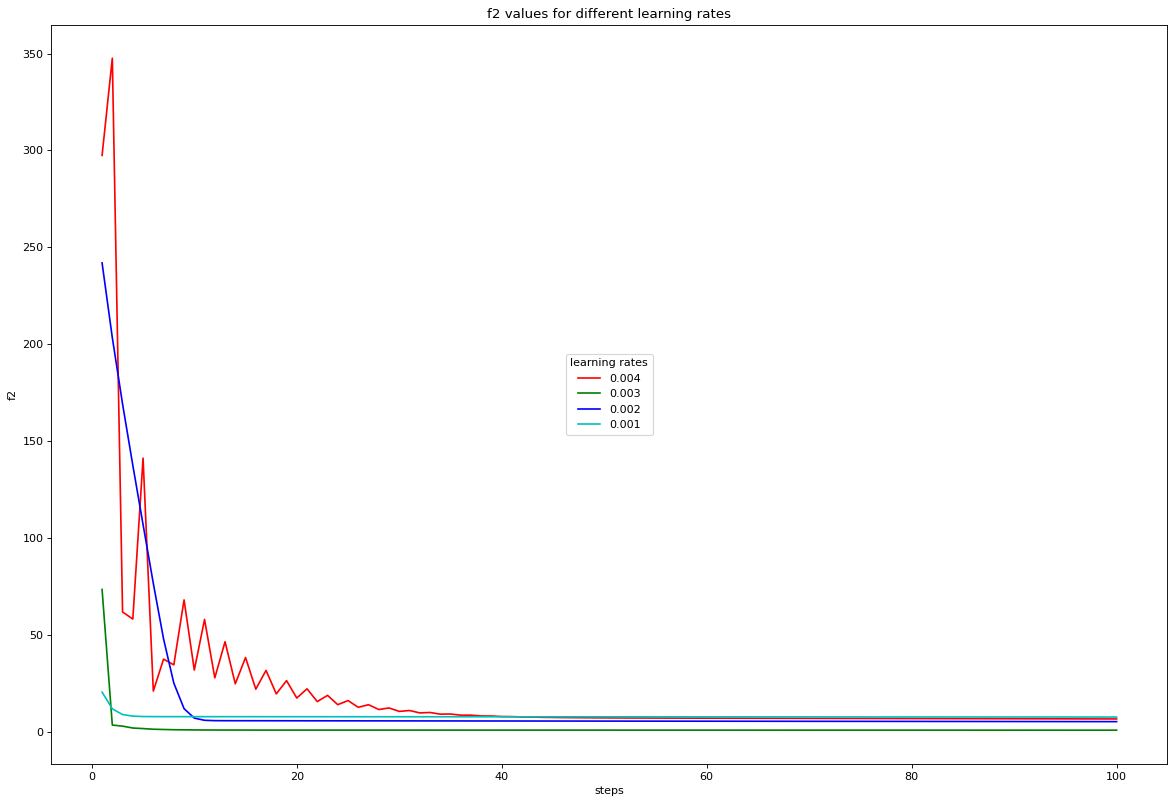

In [ ]:
make_plot00(f2,"f2",100,[0.004,0.003,0.002,0.001])

Ας εξετάσουμε την f2 σε περισσότερα βήματα

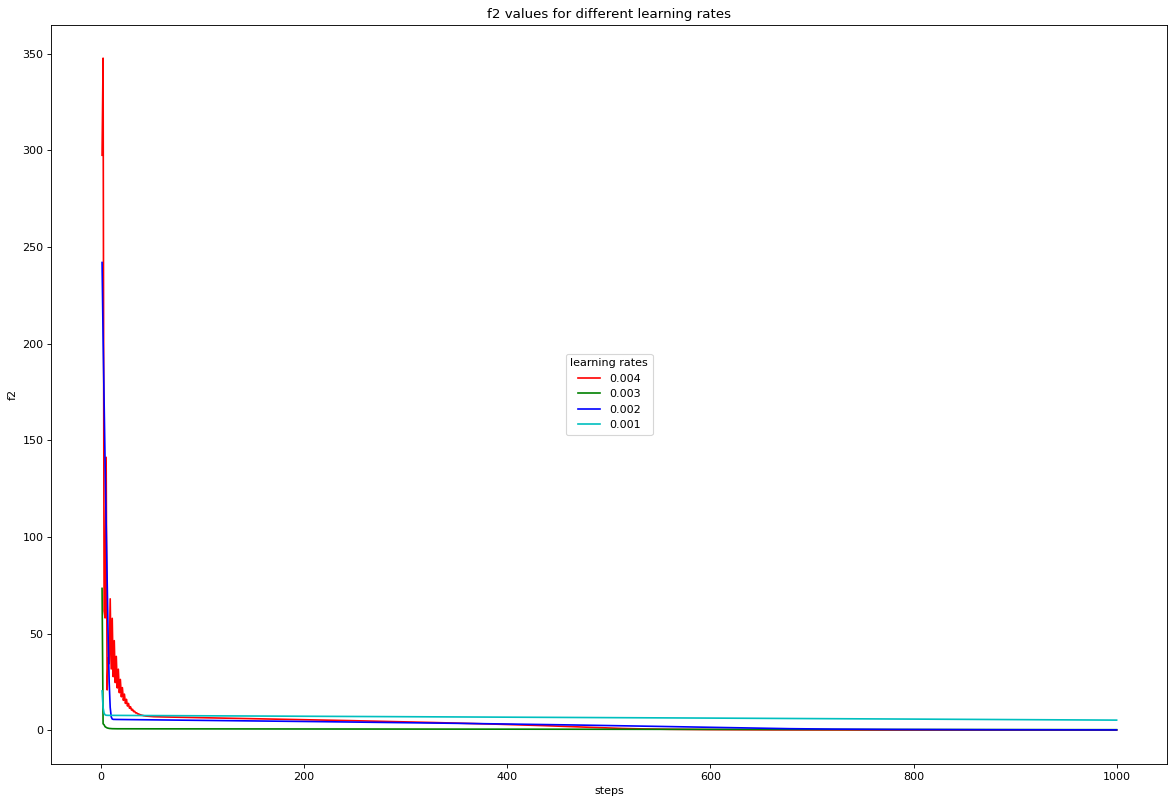

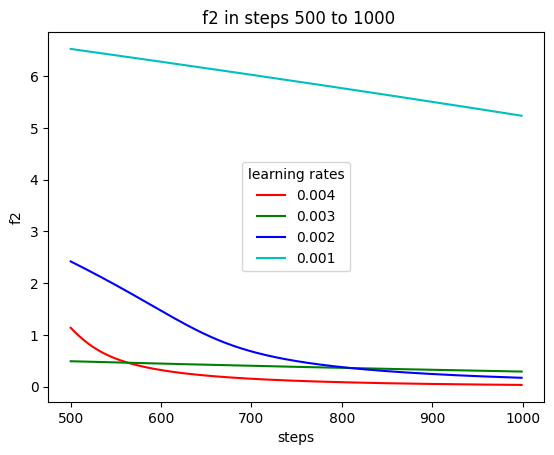

In [ ]:
make_plot00(f2,"f2",1000,[0.004,0.003,0.002,0.001])

# the last 500 steps
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b','c','m','y','k','w'])))
for lr in [0.004,0.003,0.002,0.001]:
  values=GD(f2,0,0,1000,lr)[500:1000]
  plt.plot(range(500,1000),values)

plt.legend( [0.004,0.003,0.002,0.001],title='learning rates',loc='center')
plt.xlabel('steps')
plt.ylabel('f2')
plt.title(" f2 in steps 500 to 1000")
plt.show()

# **Τι συμβαίνει για μεγάλες και μικρές τιμές του learning rate**


**• Τι συμβαίνει για μεγάλες τιμές του learning rate;**

- Σε μεγάλες τιμές του learning rate σε κάθε βήμα οι τιμές μεταπηδούσαν εκείνες που έδιναν το ελάχιστο . Έτσι , υπήρχαν ακόμα και περιπτώσεις που ο αλγορίθμος χειροτέρευε αποκλίνοντας αντί να συγκλίνει προς τη λύση.   

**• Τι συμβαίνει για μικρές τιμές του learning rate;**

- Εξαιτίας των μικρών βημάτων απαιτούν υπερβολικά πολλές επαναλήψεις μέχρι να συγκλίνει ο αλγόριθμος σε σταθερό σημείο .


Ακολουθούν παραδείγματα . 


Στις παρακάτω περιπτώσεις η f2 όλο και απομακρύνεται από το 0 και προφανώς δεν συγκλίνει ποτέ στις λύσεις

In [ ]:
print("These learning rates are too big for f2 (with x1 and x2 initially equal to 0)")
show_fvalues(f2,0,0,100,0.1)

show_fvalues(f2,0,0,100,0.01)

show_fvalues(f2,0,0,100,0.005)



These learning rates are too big for f2 (with x1 and x2 initially equal to 0)
With learning rate 0.1 , after 100 steps values are [8064340593.79200, 5.38470353363385e+30, 1.59876763748409e+93, 4.18461976970197e+280, 7.50357044460652e+842, 4.32617266590257e+2529, 8.29108759705540e+7589, 5.83625780024917e+22770, 2.03565116820727e+68313, 8.63793701488218e+204940, 6.59978906893098e+614823, 2.94367678882643e+1844472, 2.61198288496753e+5533418, 1.82478178571357e+16600256, 6.22203956820183e+49800769, 2.46659736086865e+149402310, 1.53672000204874e+448206932, 3.71607259037164e+1344620797, 5.25475562303037e+4033862393, 1.48579032973410e+12101587182, 3.35871024419248e+36304761547, 3.87987356509581e+108914284643, 5.98070906687566e+326742853931, 2.19057429059028e+980228561796, 1.07640056139152e+2940685685390, 1.27709058569413e+8822057056171, 2.13287334563047e+26466171168514, 9.93562421828699e+79398513505543, 1.00435079775791e+238195540516633, 1.03742388629022e+714586621549900, 1.14332233173755e+214

Στις παρακάτω περιπτώσεις όσο μικραίνει το lr τόσο πιο αργά συγκλίνει η f1 (υπάρχουν και τα γραφήματα που έχουν προηγηθεί)

In [ ]:
print("These learning rates are too small  for f1 (with x1 and x2 initially equal to 0). This is how fast the algorithm converges:")

print("With lr=0.1 after {} steps".format(y01[0],y01[1]))
print("With lr=0.05 after {} steps".format(y005[0],y005[1]))
print("With lr=0.01 after {} steps".format(y001[0],y001[1]))
print("With lr=0.005 after {} steps".format(y0005[0],y0005[1]))
print("With lr=0.001 after {} steps".format(y0001[0],y0001[1]))



These learning rates are too small  for f1 (with x1 and x2 initially equal to 0). This is how fast the algorithm converges:
With lr=0.1 after 51 steps
With lr=0.05 after 99 steps
With lr=0.01 after 432 steps
With lr=0.005 after 798 steps
With lr=0.001 after 3197 steps


Στην ενότητα "Πόσες επαναλήψεις χρειάζεται ο αλγόριθμος για να συγκλίνει σε στάσιμο σημείο για διαφορετικές τιμές του learning rate για κάθε συνάρτηση" έχουν προηγηθεί κι άλλες εκπτυπώσεις των συνολικών βημάτων για περισσότερα learning rates και για τις δύο συναρτήσεις

#**Τι συμβαίνει αν χρησιμοποιήσετε διαφορετικές τιμές αρχικοποίησης των μεταβλητών**

Δημιουργία αναλυτικών ραβδογραμμάτων

In [ ]:
def steps_many_lr(f,x1_0,x2_0,lr_list):
  steps=[]
  for lr in lr_list:
    steps.append(GD_convergence(f,x1_0,x2_0,10000,lr,0.00001)[0])

  return steps

In [ ]:
lr_list=[0.75,0.5,0.1,0.05]
initials=[[-1,-1],[0,0],[1,1],[4,4]]

f1_steps=[]

for [u1,u2] in initials :
  f1_steps.append(steps_many_lr(f1,u1,u2,lr_list))

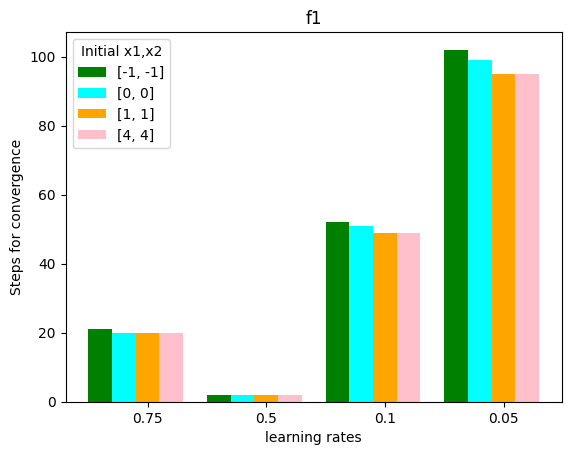

In [ ]:
#parts of code taken from https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/
 
x = np.arange(4)
width = 0.2
  
# plot data in grouped manner of bar type

plt.bar(x-0.4, f1_steps[0] , width, color='green')
plt.bar(x-0.2, f1_steps[1] , width, color='cyan')
plt.bar(x, f1_steps[2] , width, color='orange')
plt.bar(x+0.2, f1_steps[3] , width, color='pink')

plt.xticks(x,lr_list)
plt.xlabel("learning rates")
plt.ylabel("Steps for convergence")
plt.legend(initials,title="Initial x1,x2")
plt.title('f1')
plt.show()

In [ ]:
lr_list=[0.004,0.002,0.001]
initials=[[0,0],[-1,1],[-2,2],[-3,3],[-5,5]]

f2_steps=[]

for [u1,u2] in initials :
  f2_steps.append(steps_many_lr(f2,u1,u2,lr_list))

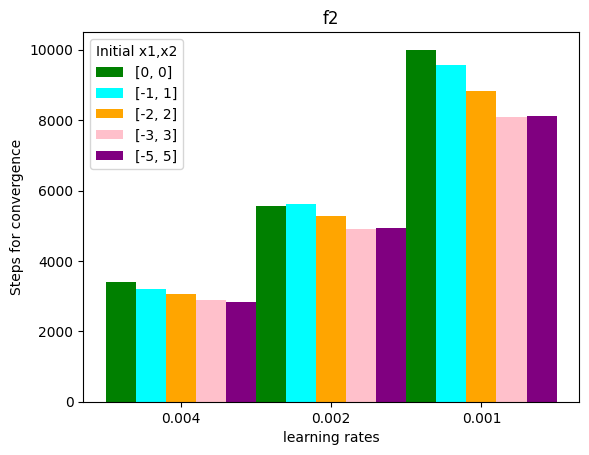

In [ ]:
x = np.arange(3)
width = 0.2
  
# plot data in grouped manner of bar type

plt.bar(x-0.4, f2_steps[0] , width, color='green')
plt.bar(x-0.2, f2_steps[1] , width, color='cyan')
plt.bar(x, f2_steps[2] , width, color='orange')
plt.bar(x+0.2, f2_steps[3] , width, color='pink')
plt.bar(x+0.4, f2_steps[4] , width, color='purple')

plt.xticks(x,lr_list)
plt.xlabel("learning rates")
plt.ylabel("Steps for convergence")
plt.legend(initials,title="Initial x1,x2")
plt.title('f2')
plt.show()

Παρατήρηση:Τόσο για την f1 όσο και την f2 όπως ήταν αναμενόμενο όσο πιο κοντά είναι ήδη τα αρχικά χ1,χ2 στις λύσεις τόσο πιο γρήγορος είναι κι ο αλγόριθμος.